# Electricity Consumption - Univariate Time Series 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Electricity Consumption.csv', parse_dates=["DATE"], index_col="DATE")

In [4]:
data.head()


,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


### <font color='Orange'> Observation: </font>
1) We have monthly data from January 1973 to December 2019
2) The data is in TW

#### Manipulating the Variables

In [5]:
data.rename(columns={"Electricty_Consumption_in_TW":"Consumption"},inplace=True)

In [6]:
data['month'] = data.index.month

In [7]:
data['year']=data.index.year

In [8]:
data

,Consumption,month,year
DATE,,,
1973-01-01,35.9728,1,1973
1973-02-01,36.1334,2,1973
1973-03-01,35.0625,3,1973
1973-04-01,33.8416,4,1973
1973-05-01,33.5107,5,1973
...,...,...,...
2019-05-01,97.5860,5,2019
2019-06-01,110.8580,6,2019
2019-07-01,122.1014,7,2019


# EDA

In [9]:
data.Consumption.describe()

count    561.000000
mean      76.681764
std       22.756474
min       33.510700
25%       55.919700
50%       78.417000
75%       93.840600
max      123.216300
Name: Consumption, dtype: float64

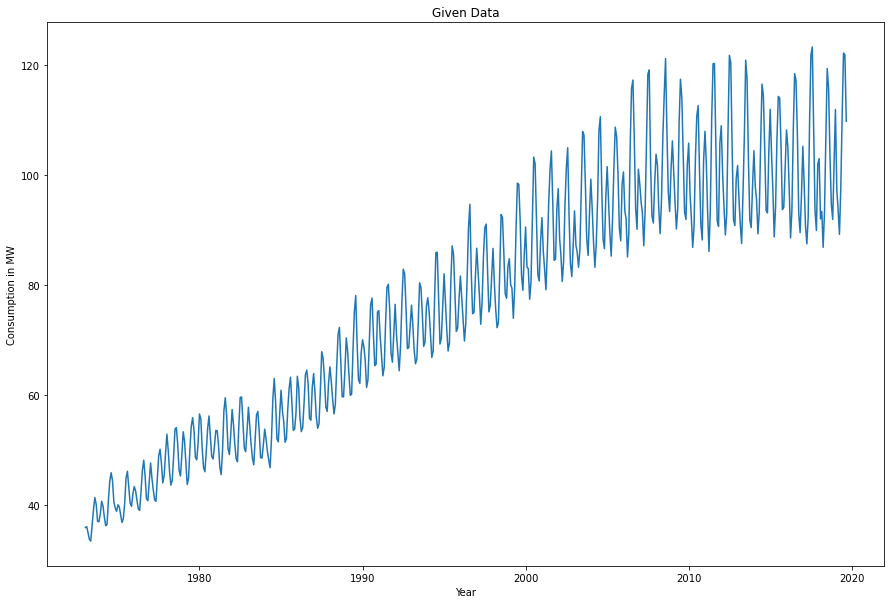

In [10]:
plt.figure(figsize=(15,10))
plt.xlabel("Year")
plt.ylabel("Consumption in MW")
plt.title("Given Data")
plt.plot(data.Consumption)
plt.show()

### Constructing Monthly Consumption and Yearly Consumption to extract more infor on Trend and Seasonality

In [13]:
monthly_Consumption = pd.pivot_table(data,values='Consumption',index='month',columns='year')

#monthly_Consumption.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [14]:
monthly_Consumption

year,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,,,,,,,,,,,,
1,35.9728,40.7455,40.0956,43.4099,47.6892,52.9153,53.3617,56.5838,53.5867,57.4002,...,105.7413,107.8967,108.9151,101.6890,104.3752,111.8708,108.1515,105.1879,102.9398,111.8520
2,36.1334,39.8340,39.6944,42.5826,44.8505,49.9488,51.6279,55.6802,53.5461,54.6248,...,96.4428,101.9572,100.0117,95.5366,97.7907,103.4990,104.9900,98.0069,92.0095,97.3261
3,35.0625,37.9408,38.3040,40.9244,42.8557,46.1749,47.8264,50.4428,51.0708,51.1896,...,92.2986,93.2285,94.3484,91.0434,95.5280,97.4134,97.5969,90.8029,93.3526,93.8406
4,33.8416,36.3004,36.8939,39.3533,41.0177,43.6652,43.7935,46.8693,46.9172,48.4958,...,86.8242,86.0874,89.0821,87.5189,89.2783,88.7323,88.5477,87.4594,86.8386,89.1873
5,33.5107,36.5293,37.5668,39.0766,40.7201,44.5402,44.8591,46.0886,45.5795,47.9140,...,90.6389,93.7706,92.7937,96.5166,93.2729,94.1360,93.5168,92.2811,93.2361,97.5860
6,36.4823,40.8899,40.3832,42.4851,45.0610,48.9480,50.3292,49.7595,50.0235,54.5292,...,103.0377,110.3572,108.5421,107.0627,105.7336,106.5504,108.1813,109.6104,107.1009,110.8580
7,39.1412,44.3563,44.9671,46.3693,48.9685,53.8292,54.3579,53.8273,57.1384,59.5975,...,110.6045,120.1457,121.6974,120.8149,116.4651,114.2235,118.3568,121.7478,119.2874,122.1014
8,41.4137,45.9240,46.1853,48.1945,50.1898,54.1182,55.9197,56.2272,59.5376,59.6727,...,112.5792,120.2087,120.2822,117.2932,114.3700,113.9230,117.1375,123.2163,115.7108,121.7765
9,40.1639,44.4555,43.3001,45.1688,47.5982,50.9980,53.5776,52.5737,56.1935,54.9644,...,100.4701,106.1109,104.6692,102.4185,104.3899,104.9454,107.3046,108.4514,103.4070,109.7190


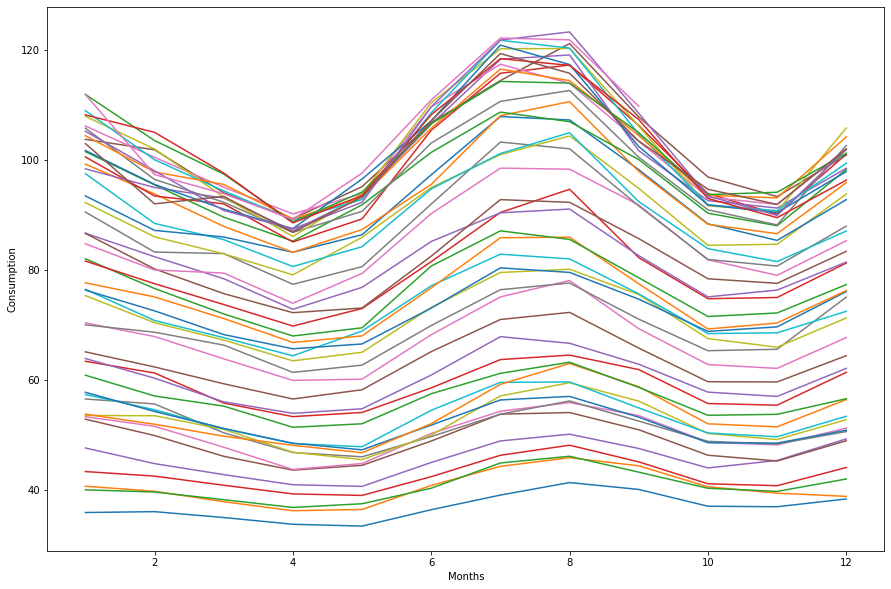

In [15]:
plt.figure(figsize=(15,10))
plt.plot(monthly_Consumption)
plt.xlabel("Months")
plt.ylabel("Consumption")
plt.show()

In [16]:
yearly_consumption = pd.pivot_table(data,values='Consumption',index='year',columns='month')

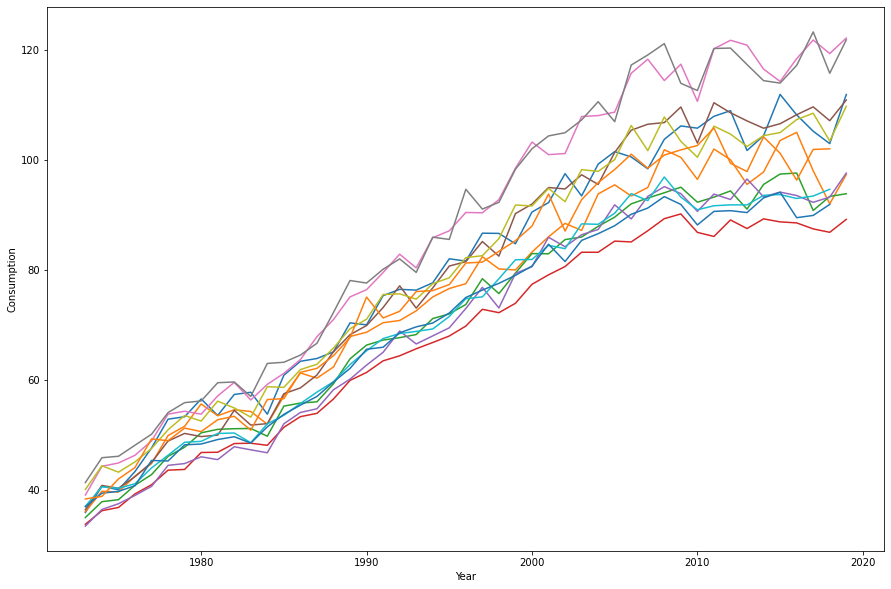

In [17]:
plt.figure(figsize=(15,10))
plt.plot(yearly_consumption)
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.show()

### Plotting Subplots to see the comparison of the plots

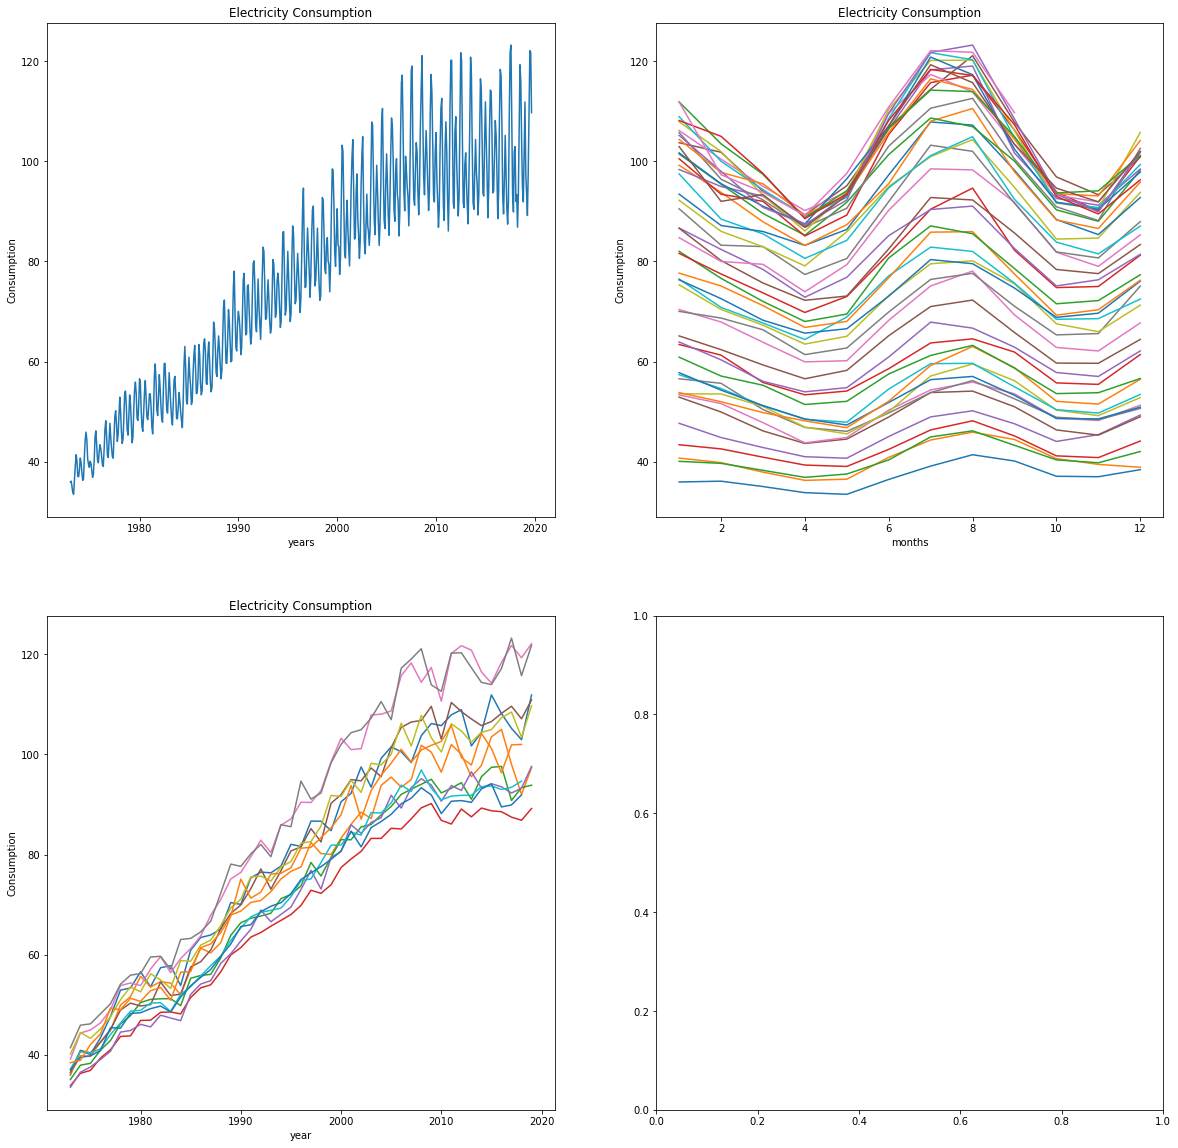

In [18]:
fig, axes = plt.subplots(2,2,sharex=False,sharey=False)

fig.set_figwidth(20)
fig.set_figheight(20)
axes[0][0].plot(data['Consumption'])
#axes[0][0].set_title("Electricity Consumption")
axes[0][0].set(xlabel="years",ylabel="Consumption",title='Electricity Consumption')

axes[0][1].plot(monthly_Consumption)
axes[0][1].set(xlabel='months',ylabel='Consumption',title='Electricity Consumption')

axes[1][0].plot(yearly_consumption)
axes[1][0].set(xlabel='year',ylabel='Consumption',title='Electricity Consumption')

plt.show()

# Decomposition

### Additive Decomposition 
Value = Trend + Seasonality + Cyclicity + Irregular Component 

### Multiplicative Decomposition 
Value = Trend * Seasonality * Cyclicity * Irregular Component

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Initial Observation:
1) Positive Trend
2) Sesonality is present



<Figure size 1440x576 with 0 Axes>

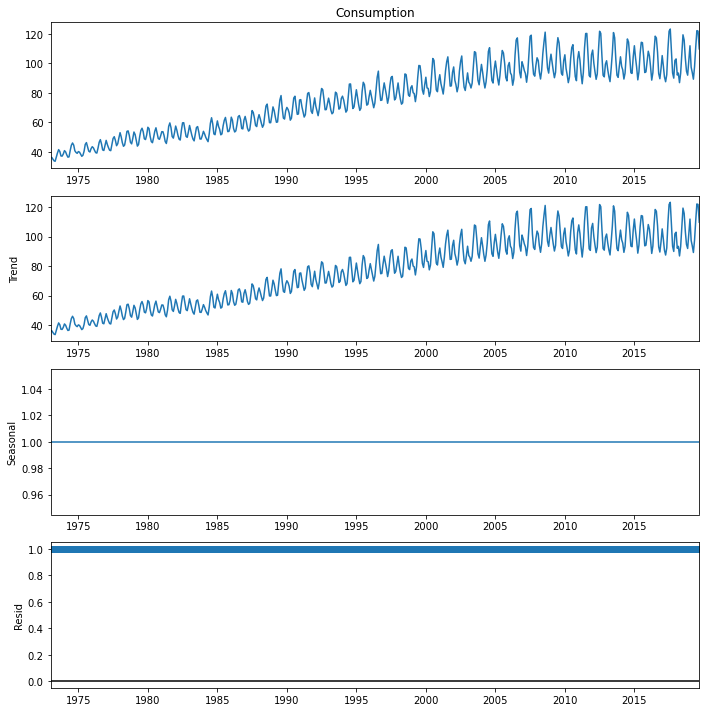

In [22]:
## Multiplicative Decompose

plt.figure(figsize=(20,8))
mul_result =seasonal_decompose(data["Consumption"],model='multiplicative',period=1)
plt.rcParams.update({'figure.figsize':(10,10)})
mul_result.plot()
plt.show()

In [331]:
mul_df = pd.concat([mul_result.seasonal,mul_result.trend,mul_result.resid,mul_result.observed],axis=1)

In [332]:
mul_df

,seasonal,trend,resid,Consumption
DATE,,,,
1973-01-01,1.0,35.9728,1.0,35.9728
1973-02-01,1.0,36.1334,1.0,36.1334
1973-03-01,1.0,35.0625,1.0,35.0625
1973-04-01,1.0,33.8416,1.0,33.8416
1973-05-01,1.0,33.5107,1.0,33.5107
...,...,...,...,...
2019-05-01,1.0,97.5860,1.0,97.5860
2019-06-01,1.0,110.8580,1.0,110.8580
2019-07-01,1.0,122.1014,1.0,122.1014


### Observation:

* Trend Component is more prominent compared to Seasonality

<Figure size 1440x576 with 0 Axes>

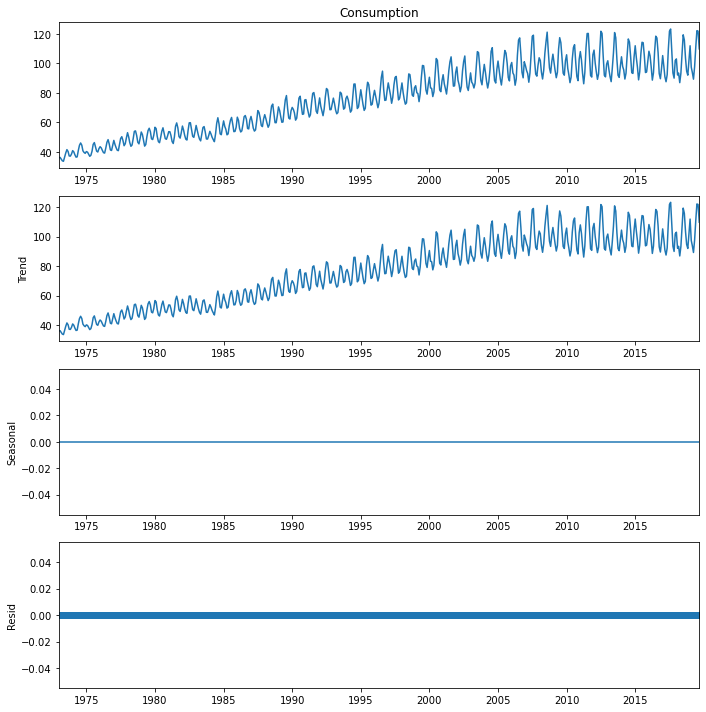

In [23]:
plt.figure(figsize=(20,8))
add_result =seasonal_decompose(data["Consumption"],model='additive',period=1)
plt.rcParams.update({'figure.figsize':(10,10)})
add_result.plot()
plt.show()

In [24]:
add_df = pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed],axis=1)add_result

In [333]:
add_df

,seasonal,trend,resid,Consumption
DATE,,,,
1973-01-01,0.0,35.9728,0.0,35.9728
1973-02-01,0.0,36.1334,0.0,36.1334
1973-03-01,0.0,35.0625,0.0,35.0625
1973-04-01,0.0,33.8416,0.0,33.8416
1973-05-01,0.0,33.5107,0.0,33.5107
...,...,...,...,...
2019-05-01,0.0,97.5860,0.0,97.5860
2019-06-01,0.0,110.8580,0.0,110.8580
2019-07-01,0.0,122.1014,0.0,122.1014


# Checking Stationarity

In [28]:
roll_mean =  data.Consumption.rolling(12).mean()
roll_std = data.Consumption.rolling(12).std()

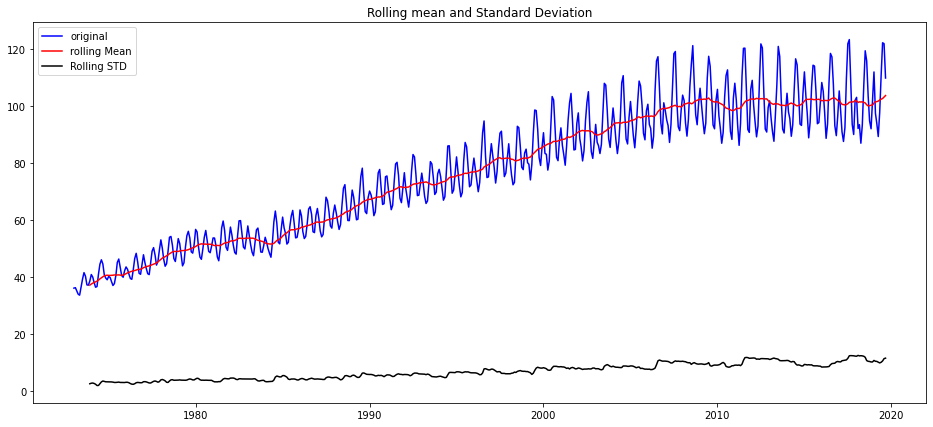

In [29]:
roll_mean =  data.Consumption.rolling(12).mean()
roll_std = data.Consumption.rolling(12).std()

plt.figure(figsize=(16,7))

plt.plot(data.Consumption,color='blue',label="original")
plt.plot(roll_mean,color='red',label='rolling Mean')
plt.plot(roll_std,color='black',label="Rolling STD")
plt.legend(loc='best')

plt.title("Rolling mean and Standard Deviation")
plt.show()

Observation: 
1) Rolling Mean is not constant so series is not Constant

### ADF Test

Null Hypothesis : Non stationary<br>
Alternate Hypo: Stationary





In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
adfuller_results = adfuller(data['Consumption'],autolag='AIC')

print("ADF statistics {}".format(adfuller_results[0]))

print("p-value: {}".format(adfuller_results[1]))

ADF statistics -1.7405933729832443
p-value: 0.41032816044686793


#### p value is > 5% so we cannot reject null hypoythesis 

##### *<font color ='green'> *The given time series is not Stationary*</font>*

# Converting Non Stationary Time Series to Stationary Time Series 
1) Differencing
2) Rolling stats
3) Transformation

#### Differencing  1) Normal differencing 2) Seasonal Differencing

#### Using Normal Differencing 

In [53]:
data['difference_1'] = data['Consumption'].diff(1)

In [54]:
data['difference_1'].head()

DATE
1973-01-01       NaN
1973-02-01    0.1606
1973-03-01   -1.0709
1973-04-01   -1.2209
1973-05-01   -0.3309
Name: difference_1, dtype: float64

<AxesSubplot:xlabel='DATE'>

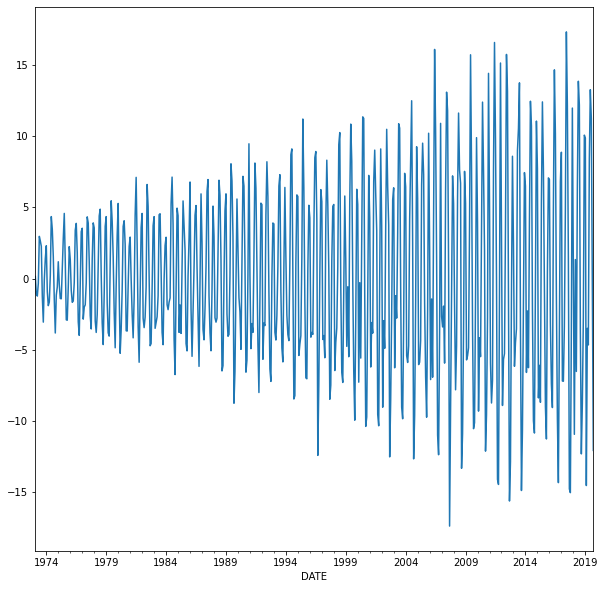

In [55]:
data['difference_1'].dropna().plot()

## ADF Test to check if Log applied Consumption value is stationary or not

In [57]:
adfuller_results = adfuller(data['difference_1'].dropna(),autolag='AIC')

print("ADF statistics {}".format(adfuller_results[0]))

print("p-value: {}".format(adfuller_results[1]))

ADF statistics -7.941665363981184
p-value: 3.3013438021514486e-12


P valye is less than 0.05 so it is stationary

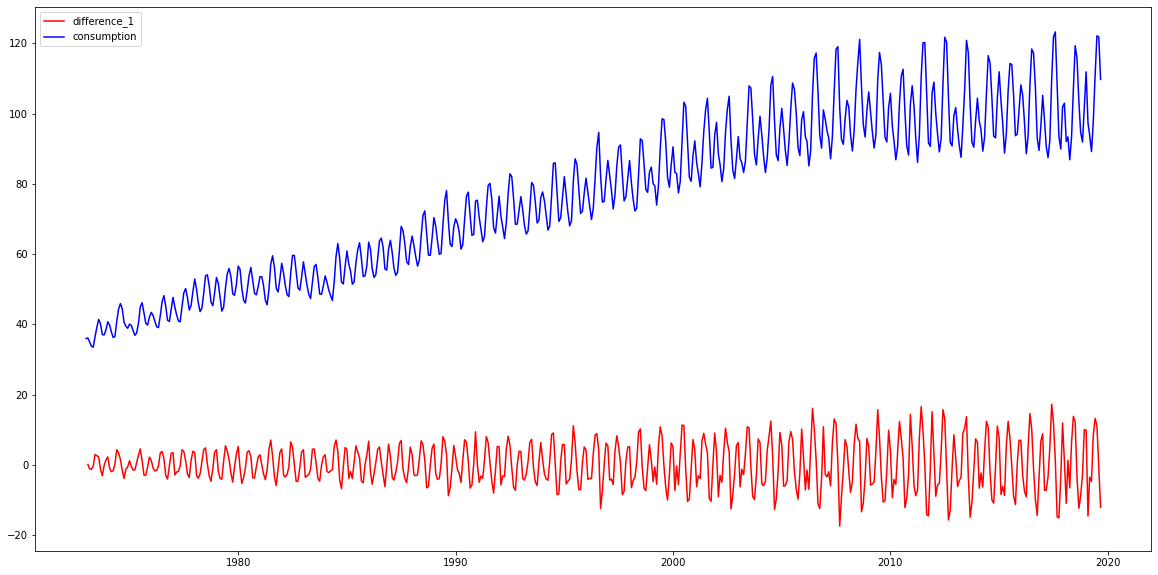

In [59]:

plt.figure(figsize=(20,10))
#plt.plot(data['Difference_1'].dropna(),color="orange",label='diff_1')
plt.plot(data['difference_1'],color='red',label='difference_1')
plt.plot(data['Consumption'],color='blue',label='consumption')
plt.legend(loc='best')

plt.show()

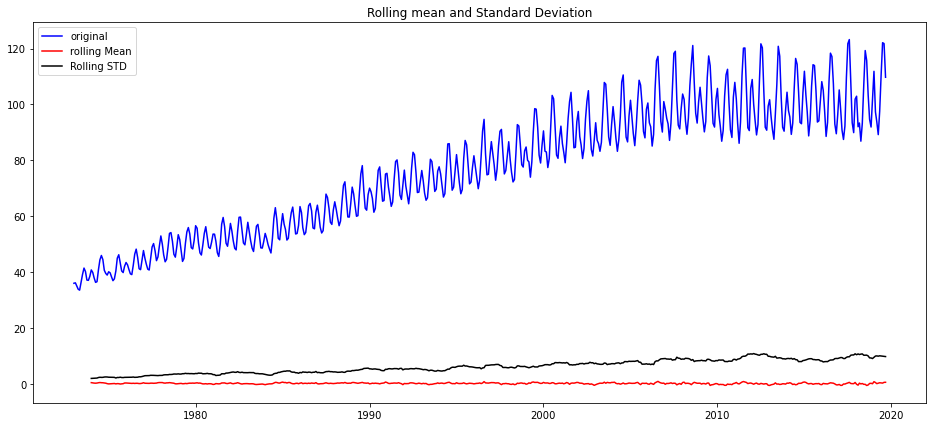

In [61]:
roll_mean =  data.difference_1.rolling(12).mean()
roll_std = data.difference_1.rolling(12).std()

plt.figure(figsize=(16,7))

plt.plot(data.Consumption,color='blue',label="original")
plt.plot(roll_mean,color='red',label='rolling Mean')
plt.plot(roll_std,color='black',label="Rolling STD")
plt.legend(loc='best')

plt.title("Rolling mean and Standard Deviation")
plt.show()

### Note: Trend is gone now

In [62]:
#### D value is 0 - For ARIMA model
stationary_series = data.difference_1.dropna()

In [285]:
### Dividing Data into Train Data and Test

train =data.Consumption[:'12-01-2018']
test = data.Consumption['01-01-2019':]

In [288]:
print(train.shape)
print(test.shape)

(552,)
(9,)


# BOX - Jenkins Methodology

#### ACF (Q value) and PACF (P value) Plots

In [254]:
from statsmodels.graphics import tsaplots

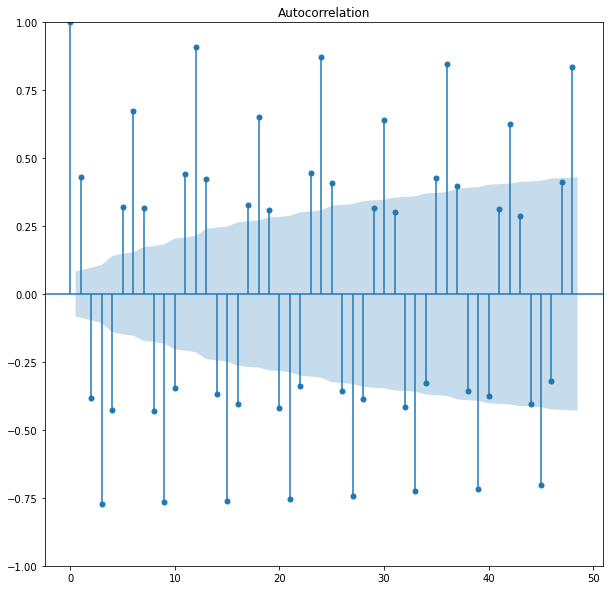

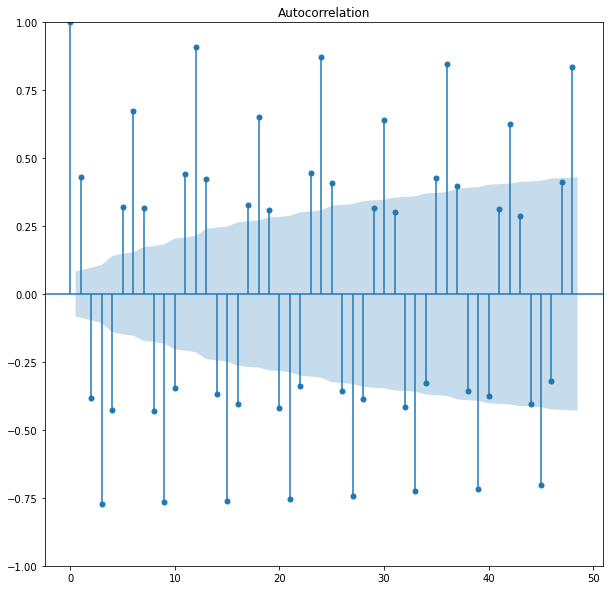

In [255]:
tsaplots.plot_acf(stationary_series, lags=48)

observation:

1) After Lag 1 it is crossing 0 so my Q value will be 1<br>
2) No Seasonality is present - ARIMA model<br>
3) Model is possible - Presence of Auto correlation<br>

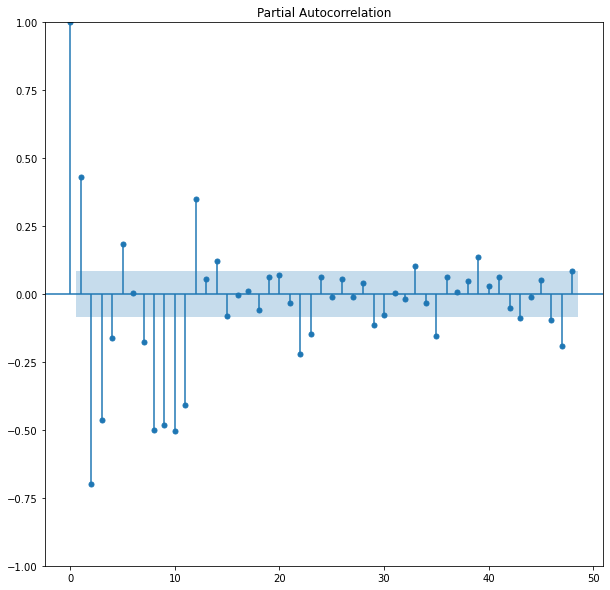

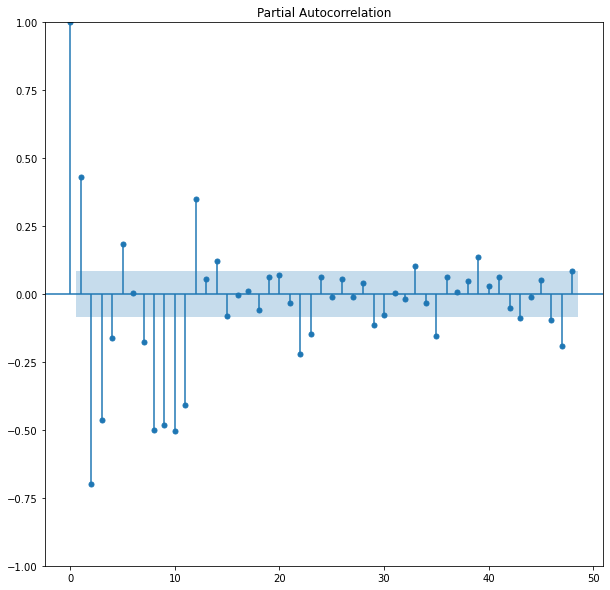

In [256]:
#### Conducting PACF to find p value 
tsaplots.plot_pacf(stationary_series, lags=48)

##### P value is 1 because pacf plots crosses 0 after 2-nd lag

Initial Assumptions based on Box-jenkins : 

ARIMA(yt, (p,d,q))

SARIMA(yt, (1,1,1))

#### Builiding models on range of p-> range(0,5,1),q= range(0,5,1) values

In [257]:
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

In [334]:
model = ARIMA(train,order=(1,1,1), enforce_stationarity=False,enforce_invertibility=False)

In [335]:
model_fit =model.fit()

In [336]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                  552
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1661.193
Date:                Sun, 07 Aug 2022   AIC                           3328.386
Time:                        16:11:03   BIC                           3341.311
Sample:                    01-01-1973   HQIC                          3333.437
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1587      0.068      2.337      0.019       0.026       0.292
ma.L1          0.5991      0.048     12.557      0.000       0.506       0.693
sigma2        24.8674      1.427     17.426      0.0

In [337]:
pred= model_fit.forecast(9)

In [338]:
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Consumption, dtype: float64

In [339]:
pred

2019-01-01    109.658593
2019-02-01    110.875741
2019-03-01    111.068882
2019-04-01    111.099531
2019-05-01    111.104394
2019-06-01    111.105166
2019-07-01    111.105288
2019-08-01    111.105308
2019-09-01    111.105311
Freq: MS, Name: predicted_mean, dtype: float64

In [340]:
print( "{} % error" .format(round(np.mean(np.abs(test -pred/test)),2)))

104.97 % error


### Optimizzing to Find best p,q,d values

In [341]:
import itertools
import warnings
warnings.filterwarnings ("ignore")

In [342]:
a =None
def autoarima(ts, p = range(0,3), q=range(0,3),d=range(0,2)):
    
    pdq = list(itertools.product(p,d,q))
    #print(pdq)
    best_aic = np.inf
    comb_params = []
    aic = []

    for params in pdq:
        model= ARIMA(ts,order=params, enforce_stationarity=False,enforce_invertibility=False)
        model_fit = model.fit()
        #print(params)
        #print(" params: {}, AIC {}" .format(params, model_fit.aic))
        
        if model_fit.aic <best_aic:
            best_aic =model_fit.aic
            best_pdq=params
            best_results=model_fit
        comb_params.append(params)
        aic.append(model_fit.aic)
    
    #print("Best ARIMA{} AIC {}".format(best_pdq,best_aic))

    a = pd.DataFrame({'Parameters':comb_params,'AIC':aic})
    print(a.sort_values(by='AIC').iloc[:10,:])

In [343]:
autoarima(train,p=range(0,5,1),q=range(0,5,1),d=range(0,5,1))

    Parameters          AIC
84   (3, 1, 4)  2662.991113
109  (4, 1, 4)  2688.309552
104  (4, 0, 4)  2695.461170
58   (2, 1, 3)  2717.020716
64   (2, 2, 4)  2717.553944
102  (4, 0, 2)  2719.787133
78   (3, 0, 3)  2720.784610
89   (3, 2, 4)  2722.503706
83   (3, 1, 3)  2722.674821
108  (4, 1, 3)  2722.769044


In [317]:
fmodel= ARIMA(train,order=(3,1,4), enforce_stationarity=False,enforce_invertibility=False)

In [318]:
model_select = fmodel.fit()

In [319]:
pred =model_select.forecast(9)

In [320]:
pred

2019-01-01    110.989760
2019-02-01    108.232446
2019-03-01     97.107164
2019-04-01     89.240036
2019-05-01     92.843150
2019-06-01    104.535110
2019-07-01    112.736310
2019-08-01    109.283220
2019-09-01     97.646102
Freq: MS, Name: predicted_mean, dtype: float64

In [321]:
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Consumption, dtype: float64

In [322]:
np.mean(np.abs((pred-test)/pred))*100

6.392964159338973

# Intime Validations

In [323]:
fct = model_select.fittedvalues

In [324]:
np.mean(np.abs( (fct - train) /train))*100

2.91081493825161

## Out of TIme Validations

In [325]:
np.mean(np.abs((pred-test)/pred))*100

6.392964159338973

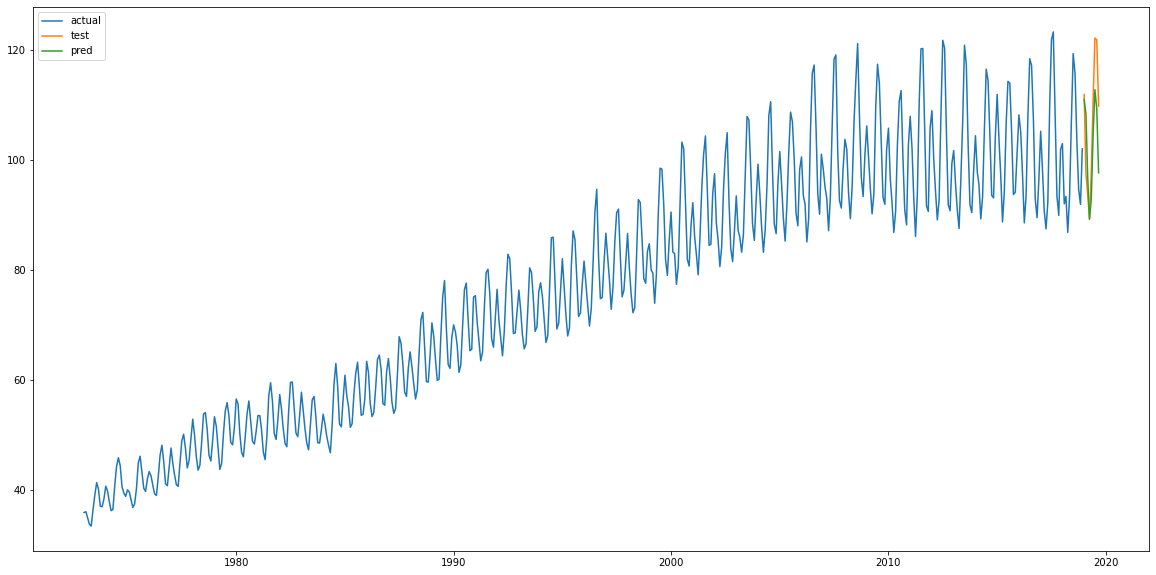

In [326]:
plt.figure(figsize=(20,10))
plt.plot(train,'-',label='actual')
plt.plot(test,label='test')
plt.plot(pred,'-',label='pred')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


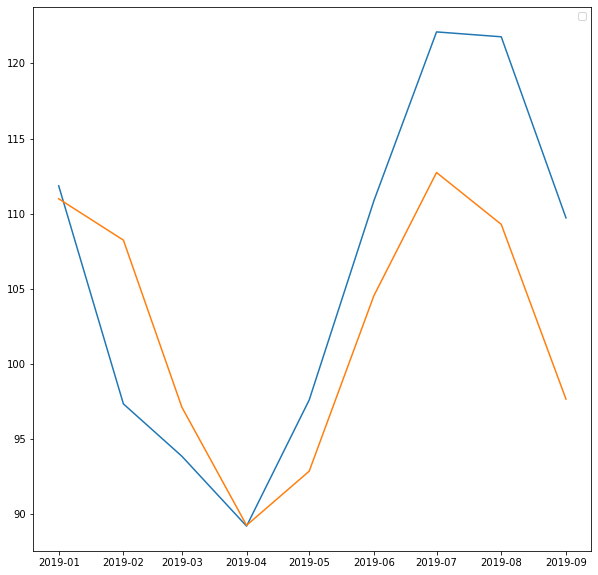

In [329]:
plt.plot(test['01-01-2019':])
plt.plot(pred['01-01-2019':])
plt.legend()
plt.show()

# Diagnostic Plots

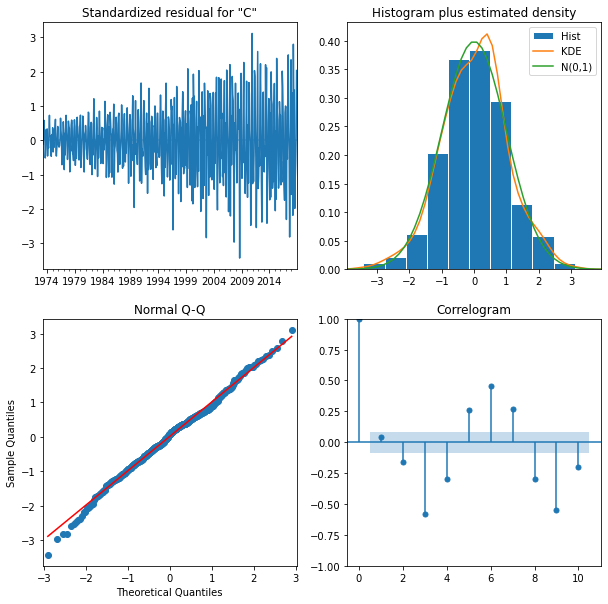

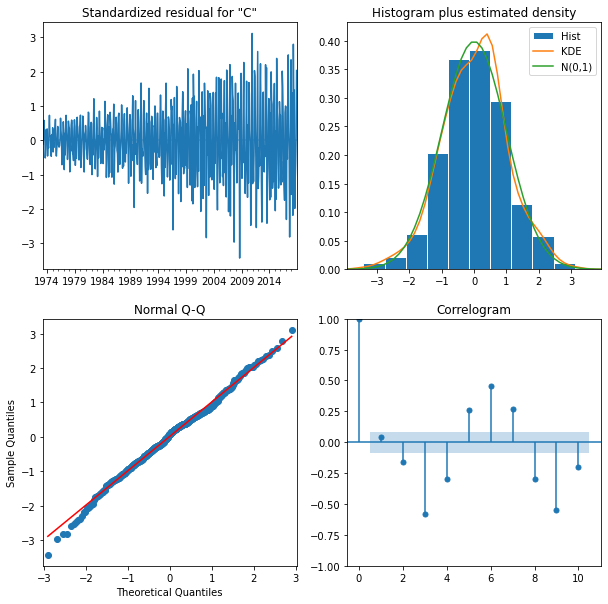

In [330]:
model_fit.plot_diagnostics()